In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [30]:
df = pd.read_csv("weights.csv")
#checking for null inputs
df.isnull().sum()

brainw    0
bodyw     0
dtype: int64

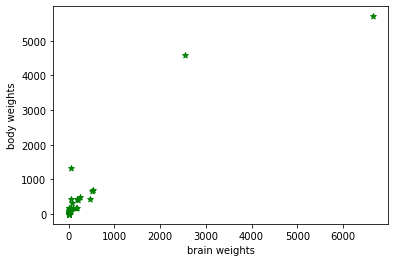

In [31]:
#looking at the correlation between the input and the output 
plt.xlabel('brain weights')
plt.ylabel('body weights')
plt.scatter(df.brainw,df.bodyw, color='green',marker='*')

In [37]:
#splitting the data into training and testing data
features = df[['brainw']]
target = df['bodyw']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=50)

In [38]:
#fit the linear regression model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [42]:
#training accuracy
r2_score = reg.score(X_train,y_train)
print(r2_score*100,'%')

87.23339393988296 %


In [44]:
y_predicted = reg.predict(X_test)
y_dataframe = pd.DataFrame(y_predicted, columns=['Predicted Values'])
print (y_dataframe)


   Predicted Values
0         99.888965
1         99.543578
2        109.073551
3        101.065981
4        103.562799
5        102.899039
6        253.788664
6213.859148292312


In [45]:
# Model testing MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predicted))
# Model testing R^2
from sklearn.metrics import r2_score
r2_score = reg.score(X_test,y_test)
print(r2_score*100,'%')
#this R2 score is super low, so the model is not a good fit
#since the data isn't that complex, it can be seen that the testing R2 score is negative due to the 
#lack of features or not enough linear correlation between the features and the target


6213.859148292312
-76.80988123618353 %


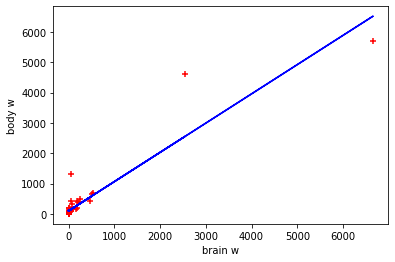

In [46]:
#to view your linear regrassion line after prediction
plt.xlabel('brain w',fontsize = 10)
plt.ylabel('body w',fontsize =10)
plt.scatter(df.brainw,df.bodyw,color='red',marker='+')
#the following line of code is to view the linear line after prediction
plt.plot(df.brainw,reg.predict(df[['brainw']]),color='blue')
